## Projeto 01 - Concessão de Cartões de Credito

### 1. Crisp-DM: Entendimento do Negócio. 

Como primeira etapa do CRISP-DM temos o entendimento do negócio.

Este é um problema de concessão de cartões de crédito, publicado no [Kaggle](https://www.kaggle.com/), uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. O link original está [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

Essa é uma base de dados com proponentes de concessão de cartões de credito, onde nosso objetivo é preditivo a inadimplência, ou seja, uma previsão para esse efeito. Através de variaveis que podem ser observadas na data da avaliação de credito.

 * **Objetivo do negócio:** O objetico aqui é que o modelo sirva o motuário para que avalie suas próprias decisões, e não a instituição de crédito.
 
 
 * **Obejtivo da Modelagem:** O objetivo é desenvolver o melhor modelo de forma a auxiliar o usuário a tomar a melhor decisão com relação a crédito.

### 2.  Crisp-Dm: Entendimento dos Dados.

Nessa etapa foram fornecidos 15 variaveis mais a variavel resposta. que está em negrito na tabela.

* **Dicionario de dados**

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo de emprego | tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|

* **Importando os Pacotes**

In [253]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

* **Carregando os Dados**

In [254]:
df = pd.read_csv('demo01.csv')
print(f"Número de Linhas e Colunas {df.shape}")

df.head()

Número de Linhas e Colunas (16650, 16)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


**Entendimento do Dados - univariada**

In [255]:
print(df["mau"].value_counts())
print(f"\nTaxa de inadimplência: {round(df['mau'].mean(), 2)}%")

False    16260
True       390
Name: mau, dtype: int64

Taxa de inadimplência: 0.02%


In [256]:
def grafico_barras(var: str, title: str) -> None:
    grafico_barras = df[var].value_counts().plot.bar(title = title)

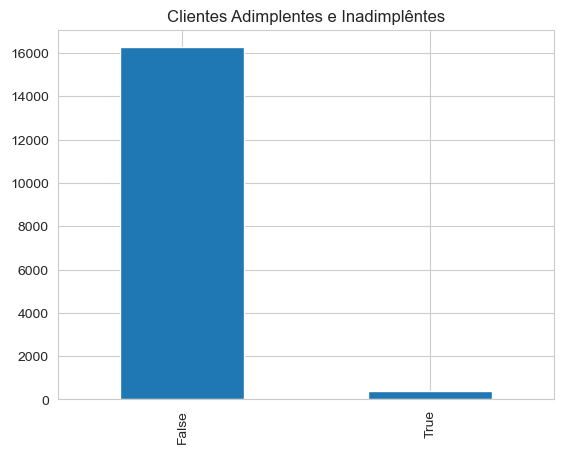

In [257]:
grafico_barras("mau", "Clientes Adimplentes e Inadimplêntes")

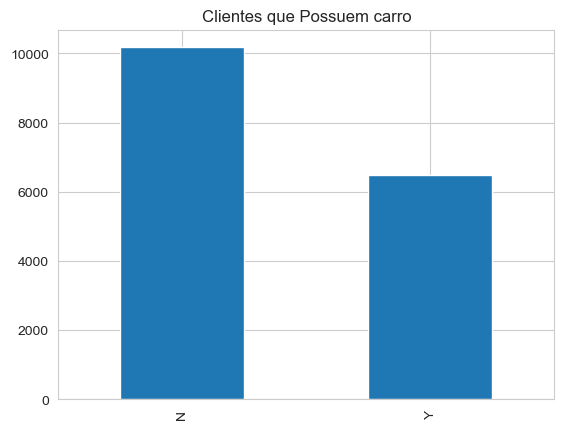

In [258]:
grafico_barras("posse_de_veiculo", "Clientes que Possuem carro")

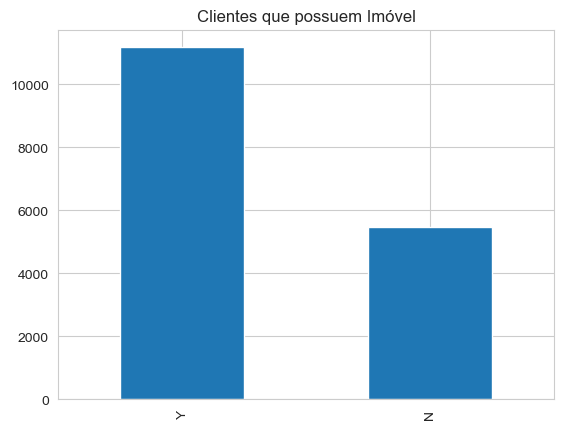

In [259]:
grafico_barras("posse_de_imovel", "Clientes que possuem Imóvel")

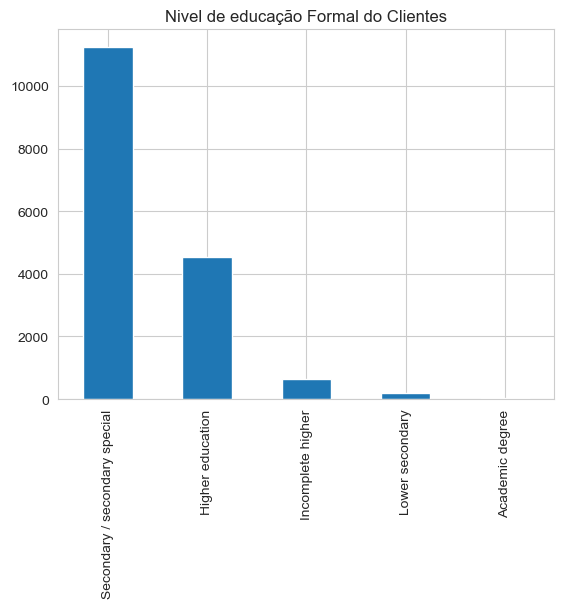

In [260]:
grafico_barras("educacao", "Nivel de educação Formal do Clientes")

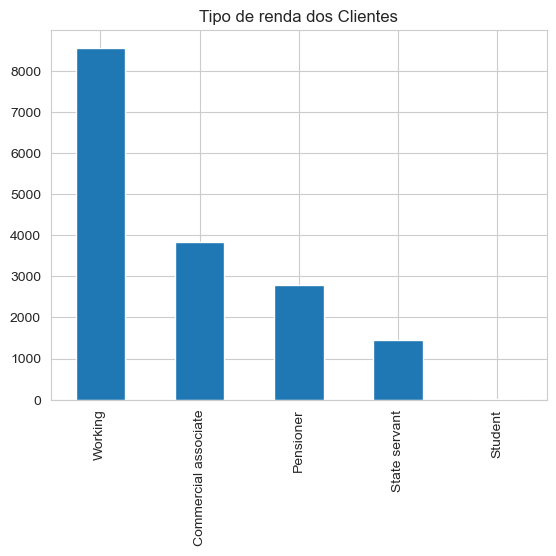

In [261]:
grafico_barras("tipo_renda", "Tipo de renda dos Clientes")

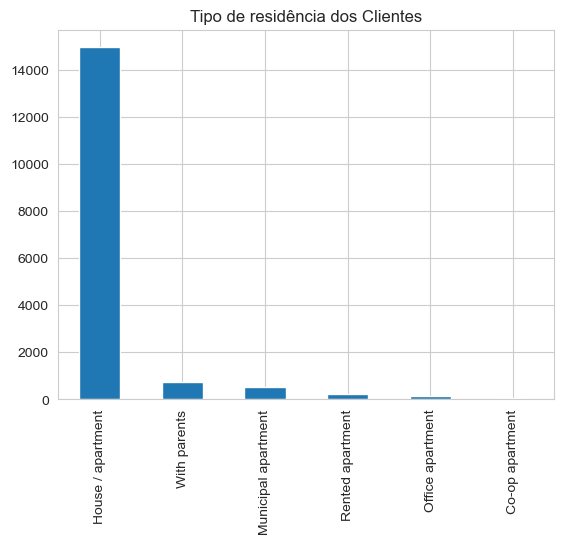

In [262]:
grafico_barras("tipo_residencia", "Tipo de residência dos Clientes")

In [263]:
def grafico_numerico(var: str, title: str) -> None:
    plt.clf()
    
    sns.displot(df, x = var, bins = 50).set(title = title)
    
    
    plt.show()

<Figure size 640x480 with 0 Axes>

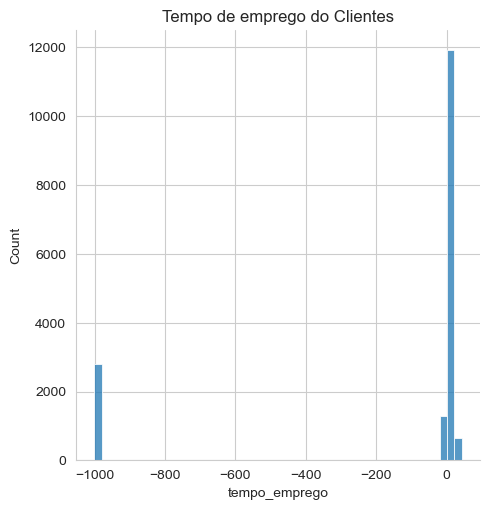

In [264]:
grafico_numerico("tempo_emprego", "Tempo de emprego do Clientes")

In [265]:
# Alterando valores de -1000 pra -2, para visualizar melhor no gráfico

df.loc[df["tempo_emprego"]<0, "tempo_emprego"] = -2

<Figure size 640x480 with 0 Axes>

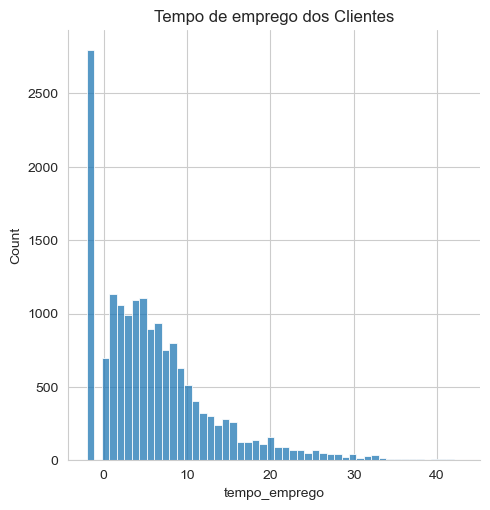

In [266]:
grafico_numerico("tempo_emprego", "Tempo de emprego dos Clientes")

<Figure size 640x480 with 0 Axes>

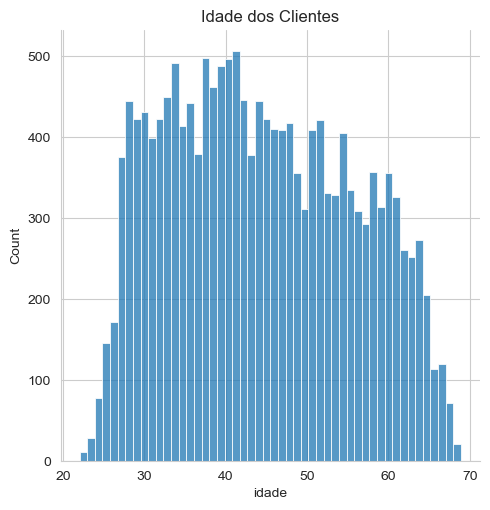

In [267]:
grafico_numerico("idade", "Idade dos Clientes")

<Figure size 640x480 with 0 Axes>

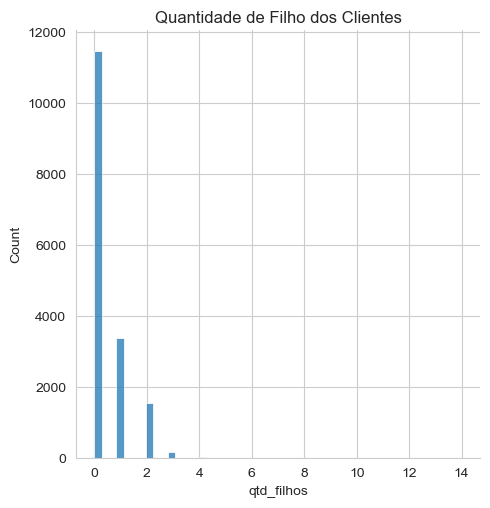

In [268]:
grafico_numerico("qtd_filhos", "Quantidade de Filho dos Clientes")

**Entendimento do Dados - bivariada**

In [269]:
def bivariada(var: str, title: str, relacao: str) -> None:
    
    var  = var
    cat_srs, bins = pd.qcut(df[var], 4, retbins = True)
    g = df.groupby(cat_srs)
    biv = g[relacao].mean()
    
    ax = biv.plot.line()
    ax.set_ylabel(relacao.capitalize())
    ax.set_title(title)
    ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

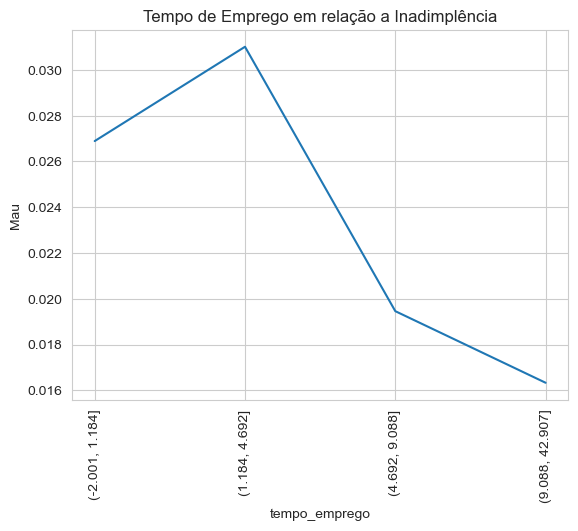

In [270]:
bivariada("tempo_emprego", "Tempo de Emprego em relação a Inadimplência", "mau")

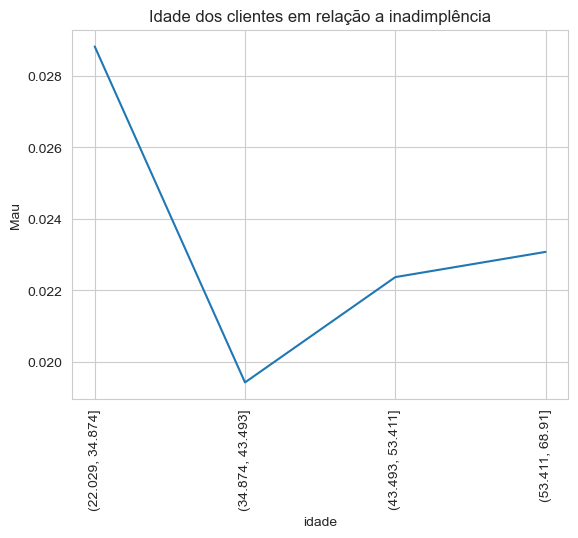

In [271]:
bivariada("idade", "Idade dos clientes em relação a inadimplência", "mau")

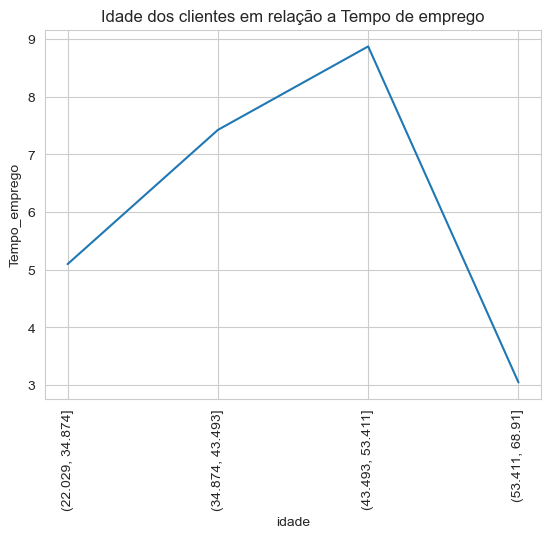

In [272]:
bivariada("idade", "Idade dos clientes em relação a Tempo de emprego", "tempo_emprego")

### 3.  Crisp-Dm: Preparação dos Dados.

In [273]:
metadata = pd.DataFrame(df.dtypes, columns = ["tipo"])

metadata["n_categorias"] = 0

for var in metadata.index:
    metadata.loc[var, "n_categorias"] = len(df.groupby([var]).size())
    
metadata

,tipo,n_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


In [274]:
def convert_dummy(df, feature, rank = 0):
    
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest], axis = 1, inplace = True)
    df.drop([feature], axis = 1, inplace = True)
    df=df.join(pos)
    
    return df

In [275]:
for var in metadata[metadata['tipo'] == 'object'].index:
    df = convert_dummy(df, var)

In [276]:
df

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,...,0,0,0,0,0,0,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,0,1,0,0,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,0,1,0,0,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,1,...,0,0,0,0,0,0,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,0,...,0,1,0,0,0,0,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,0,...,0,0,0,0,0,0,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,1,...,0,0,0,0,0,0,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,1,...,0,0,0,0,0,0,0,0,0,0


### 4.  Crisp-Dm: Modelagem.

In [277]:
x = df.drop("mau", axis = 1)
y = df["mau"]

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [278]:
# Eliminar a variavel "mau" do df de treino.
x_train

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
537,1,41.394521,5.358904,1,0,0,0,3.0,0,1,...,0,0,0,0,0,0,0,0,0,0
9375,0,53.049315,33.786301,1,0,1,1,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0
3337,0,27.882192,6.408219,1,0,1,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
13752,0,59.920548,-2.000000,1,0,0,0,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0
7218,0,48.441096,11.969863,1,0,0,0,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,1,31.854795,5.830137,1,0,0,0,3.0,1,1,...,0,0,0,0,0,0,0,0,0,0
8443,0,48.663014,6.805479,1,0,0,0,2.0,1,1,...,0,0,0,0,0,0,0,0,0,0
7365,0,53.786301,6.049315,1,1,0,0,1.0,1,0,...,0,0,1,0,0,0,0,0,0,0
15784,0,46.742466,1.265753,1,0,0,0,2.0,1,0,...,0,0,0,0,0,0,0,0,0,0


* **Rodando o Modelo**

In [279]:
clf = RandomForestClassifier(n_estimators = 20)
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [280]:
# Medindo a acuracy do Modelo

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f"Acurácia: {acc * 100 :.2f}%")

Acurácia: 97.57%


In [281]:
# Matriz de confusão

tab = pd.crosstab(index = y_pred, columns = y_test)
print(tab.iloc[1][0] / (tab.iloc[1][0] + tab.iloc[0][0]))
print(tab.iloc[1][1] / (tab.iloc[1][1] + tab.iloc[0][1]))
tab

0.008080313418217433
0.13924050632911392


mau,False,True
row_0,,
False,4051,68
True,33,11


### 5.  Crisp-Dm: Avaliação dos resultados.

A etapa final do CRISP-DM, nesse caso, a avaliação termina com a acurácia - A ideia seria avaliar o impacto do uso do modelo 
no negócio, ou seja, quanto o resultado financeiro melhora em detrimento da ultilização do nosso modelo.

Como um exemplo simples, considere que um cliente com pagador deixa(em média) 5 "dinheiros" de lucro, e um mau pagador deixa (em média) 100 "dinheiros" de prejuízo.

de acordo com a matriz de confusão:

| Decisão   | lucro dos bons    | lucro dos maus | total  |
| --------- |:-----------------:|:--------------:| ------:| 
| Aprovador | 4051 x 5          | 68 x (-100)    | 13.425 |
| Reprovar  |  33 x 5           | 11 x (-100)    | - 935  | 

Estariamos evitando, portanto, um prejuízo de - 935 "dinheiros", o que na prática significaria um aumento no lucro.